c:\Users\MAHABA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 47ms/step - accuracy: 0.8133 - loss: 0.5963 - val_accuracy: 0.9797 - val_loss: 0.0654
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 67ms/step - accuracy: 0.9695 - loss: 0.1003 - val_accuracy: 0.9856 - val_loss: 0.0452
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.9782 - loss: 0.0704 - val_accuracy: 0.9874 - val_loss: 0.0344
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.9841 - loss: 0.0553 - val_accuracy: 0.9895 - val_loss: 0.0310
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9865 - loss: 0.0459 - val_accuracy: 0.9904 - val_loss: 0.0269
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.9870 - loss: 0.0438 - val_accuracy: 0.9909 - val_loss: 0.0273
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.9881 - loss: 0.0383 - val_accuracy: 0.9914 - val_loss: 0.0246
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.9899 - loss: 0.0331 - 

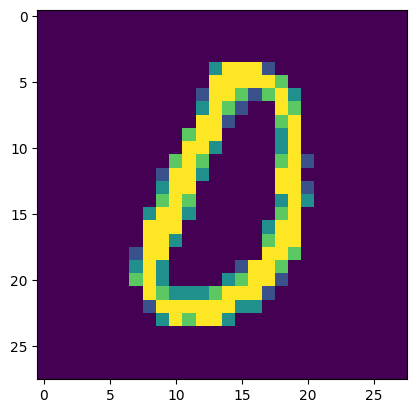

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
2


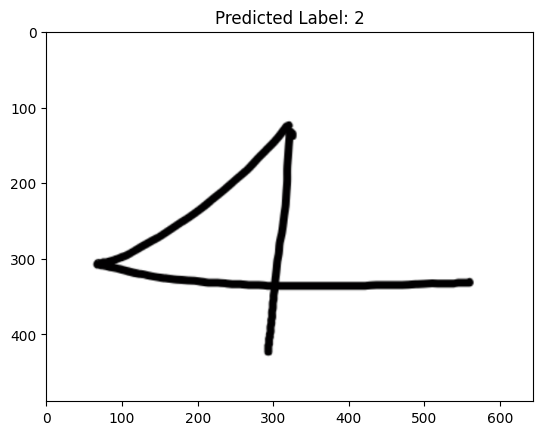

In [14]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.datasets import mnist
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

# One-hot encode the labels
num_classes = 10
y_train = np.eye(num_classes)[y_train.reshape(-1)]
y_test = np.eye(num_classes)[y_test.reshape(-1)]

def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

def train_model(model, X_train, y_train, X_test, y_test):
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=1, validation_data=(X_test, y_test))
    return model

# Create and train the model
model_training = create_model()
trained_model = train_model(model_training, X_train, y_train, X_test, y_test)

# Evaluate the model
loss, accuracy = trained_model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {accuracy * 100:.2f}%')

# Predict the number
pred = trained_model.predict(X_test[2190].reshape(1, 28, 28, 1))
predicted_label = np.argmax(pred)
print(predicted_label)
plt.imshow(X_test[2190])
plt.show()

# Load the image
two = cv2.imread("4.png")
two_gray = cv2.cvtColor(two, cv2.COLOR_BGR2GRAY)

# Preprocess the image
resize = cv2.resize(two_gray, (28, 28), interpolation=cv2.INTER_AREA)
two_scaling = tf.keras.utils.normalize(resize, axis=1)
two_cov = np.array(two_scaling).reshape(-1, 28, 28, 1)

# Predict the number
prediction = trained_model.predict(two_cov)
pred_label = np.argmax(prediction)
print(pred_label)

# Display the result
plt.imshow(two)
plt.title(f"Predicted Label: {pred_label}")
plt.show()